In [1]:
pip install --upgrade mplfinance

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates
import ipywidgets as widgets
from IPython.display import display

Step-1 : Read CSV data into a dataframe

In [ ]:
data = "https://trello.com/1/cards/6438c561324b51d6acb221e1/attachments/643ff55dd651987ffe1ad119/download/StockDataBANKBARODA_1.csv"
df = pd.read_csv(data)
print(df)

,Unnamed: 0,Date,Open,High,Low,Close,Volume
0,0,2023-03-06T09:15:00+0530,173.55,174.45,173.15,174.35,997805
1,1,2023-03-06T09:20:00+0530,174.30,174.50,173.70,174.30,750498
2,2,2023-03-06T09:25:00+0530,174.30,174.45,173.55,174.45,483941
3,3,2023-03-06T09:30:00+0530,174.45,174.90,174.25,174.80,793743
4,4,2023-03-06T09:35:00+0530,174.80,175.20,174.50,175.05,874142
...,...,...,...,...,...,...,...
1721,1721,2023-04-11T15:10:00+0530,170.70,171.00,170.60,171.00,557529
1722,1722,2023-04-11T15:15:00+0530,171.00,171.30,170.75,170.90,888538
1723,1723,2023-04-11T15:20:00+0530,170.85,171.05,170.65,170.90,762107
1724,1724,2023-04-11T15:25:00+0530,170.85,171.05,170.75,170.75,343612


Step-2: Cleaning and Preprocessing of data

In [5]:
df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume
0,0,2023-03-06 09:15:00+05:30,173.55,174.45,173.15,174.35,997805
1,1,2023-03-06 09:20:00+05:30,174.30,174.50,173.70,174.30,750498
2,2,2023-03-06 09:25:00+05:30,174.30,174.45,173.55,174.45,483941
3,3,2023-03-06 09:30:00+05:30,174.45,174.90,174.25,174.80,793743
4,4,2023-03-06 09:35:00+05:30,174.80,175.20,174.50,175.05,874142


In [6]:
df.tail()

,Unnamed: 0,Date,Open,High,Low,Close,Volume
1721,1721,2023-04-11 15:10:00+05:30,170.70,171.00,170.60,171.00,557529
1722,1722,2023-04-11 15:15:00+05:30,171.00,171.30,170.75,170.90,888538
1723,1723,2023-04-11 15:20:00+05:30,170.85,171.05,170.65,170.90,762107
1724,1724,2023-04-11 15:25:00+05:30,170.85,171.05,170.75,170.75,343612
1725,1725,2023-04-11 15:30:00+05:30,170.80,170.80,170.80,170.80,3571


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1726 entries, 0 to 1725
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype                    
---  ------      --------------  -----                    
 0   Unnamed: 0  1726 non-null   int64                    
 1   Date        1726 non-null   datetime64[ns, UTC+05:30]
 2   Open        1726 non-null   float64                  
 3   High        1726 non-null   float64                  
 4   Low         1726 non-null   float64                  
 5   Close       1726 non-null   float64                  
 6   Volume      1726 non-null   int64                    
dtypes: datetime64[ns, UTC+05:30](1), float64(4), int64(2)
memory usage: 94.5 KB


In [9]:
df.isnull()

,Unnamed: 0,Date,Open,High,Low,Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1721,False,False,False,False,False,False,False
1722,False,False,False,False,False,False,False
1723,False,False,False,False,False,False,False
1724,False,False,False,False,False,False,False


In [ ]:
#Let's assume the CSV contains columns: "Date", "Open", "High", "Low", "Close"
#Hence converting "Date" column to datetime

df['Date'] = pd.to_datetime(df['Date'])

Step-3: Plot candlestick chart

In [12]:
#Convert date to mdates format
df['Date'] = df['Date'].apply(mdates.date2num)
ohlc = df[['Date', 'Open', 'High', 'Low', 'Close']]
print(ohlc)

      Date    Open    High     Low   Close
0      0.0  173.55  174.45  173.15  174.35
1      0.0  174.30  174.50  173.70  174.30
2      0.0  174.30  174.45  173.55  174.45
3      0.0  174.45  174.90  174.25  174.80
4      0.0  174.80  175.20  174.50  175.05
...    ...     ...     ...     ...     ...
1721   0.0  170.70  171.00  170.60  171.00
1722   0.0  171.00  171.30  170.75  170.90
1723   0.0  170.85  171.05  170.65  170.90
1724   0.0  170.85  171.05  170.75  170.75
1725   0.0  170.80  170.80  170.80  170.80

[1726 rows x 5 columns]


In [14]:
#Function to update candlestick chart based on slider value
def chart_update(candlestick_width):
  plt.figure(figsize=(12,6))
  ax = plt.subplot()
  ax.xaxis_date()
  candlestick_ohlc(ax, ohlc.values, width=candlestick_width, colorup="b", colordown="r")
  plt.title('BANK of BARODA - Candlestick Chart')
  plt.xlabel('Date')
  plt.ylabel('Price')
  plt.xticks(rotation=45)
  plt.show()

In [15]:
# Create slider widget for candlestick width adjustment
candlestick_slider = widgets.FloatSlider(min= 0.1, max=1.0, step=0.1, value=0.6, description='Candlestick Width')


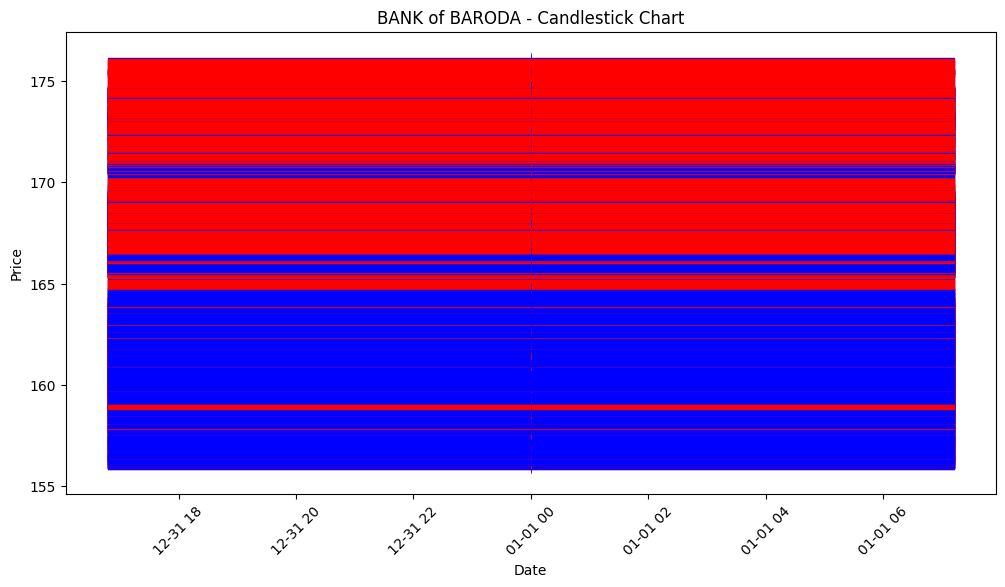

In [17]:
#Display the initial chartwith default candlestick width
chart_update(candlestick_slider.value)

In [19]:
widgets.interactive(chart_update, candlestick_width = candlestick_slider)

interactive(children=(FloatSlider(value=0.4, description='Candlestick Width', max=1.0, min=0.1), Output()), _d…